<a href="https://colab.research.google.com/github/pratikasarkar/Unsupervised-Learning/blob/master/Kmeans_vs_Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Please UpVote if you like the work!!!***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#KMeans on Iris Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
sns.set(style = 'ticks',color_codes=True)

In [0]:
df2 = pd.read_csv('/content/gdrive/My Drive/iris.csv')

In [5]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [0]:
df2.drop('species',axis = 1,inplace = True)

In [0]:
df_scaled = df2.apply(zscore)

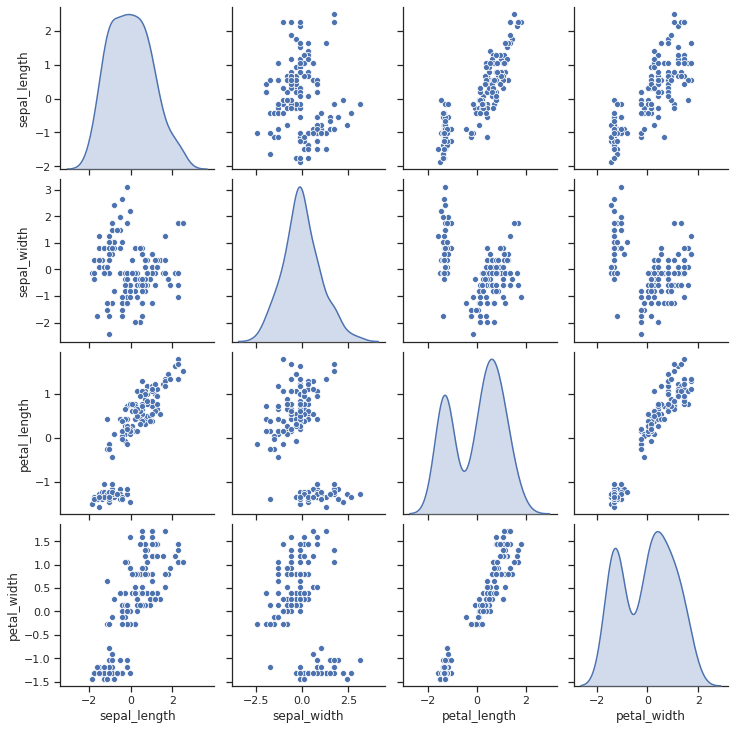

In [8]:
sns.pairplot(df_scaled,diag_kind='kde')

In [0]:
clusters_range = range(1,15)
inertia = []
for num_clust in clusters_range:
  model = KMeans(n_clusters = num_clust,random_state = 2)
  model.fit(df_scaled)
  inertia.append(model.inertia_)

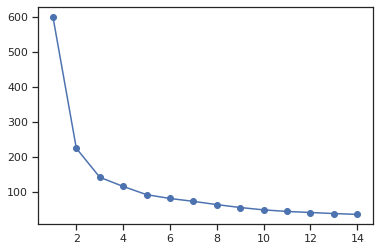

In [10]:
plt.plot(clusters_range,inertia,marker = 'o')

As we can see, at k = 3, the inertia values starts reducing at a constant rate. So we select k = 3 and build our kmeans model.

The total inertia for kmeans at k = 3 is 140.96

In [11]:
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_scaled)
df2['class'] = kmeans.labels_
df2

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df2['class'].value_counts()

0    53
1    50
2    47
Name: class, dtype: int64

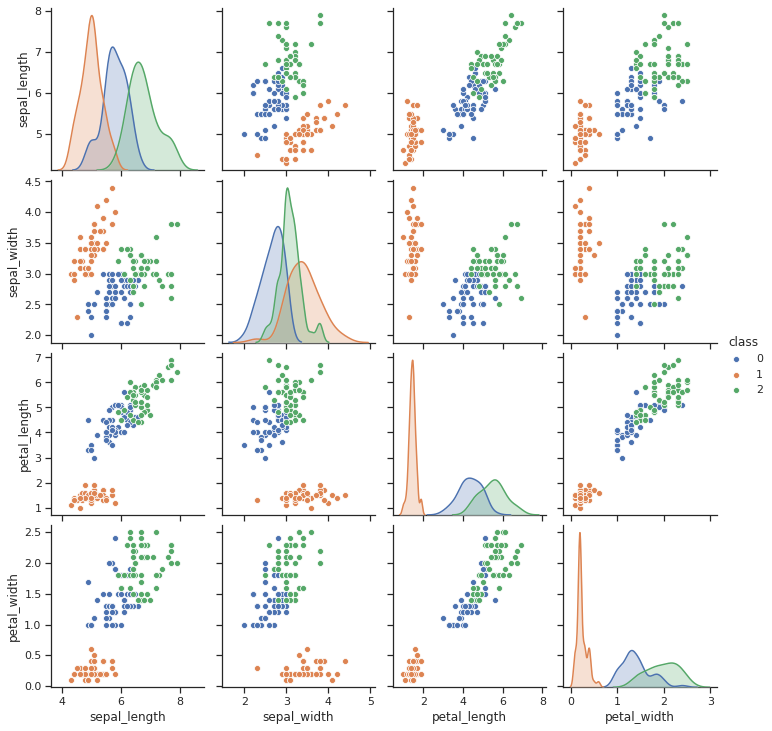

In [13]:
sns.pairplot(df2,hue = 'class')

# Agglomerative Clustering on Iris Dataset

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
agc = AgglomerativeClustering(n_clusters=3)
agc.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [0]:
df_scaled['agc_class'] = agc.labels_

In [17]:
df_scaled['agc_class'].value_counts()

0    71
1    49
2    30
Name: agc_class, dtype: int64

In [18]:
df_scaled

,sepal_length,sepal_width,petal_length,petal_width,agc_class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0
146,0.553333,-1.281972,0.705893,0.922064,0
147,0.795669,-0.124958,0.819624,1.053537,0
148,0.432165,0.800654,0.933356,1.447956,0


In [0]:
grps = df_scaled.groupby('agc_class')

In [0]:
grp0 = grps.get_group(0)
grp1 = grps.get_group(1)
grp2 = grps.get_group(2)

In [0]:
c0 = np.array([grp0['petal_length'].mean(),grp0['petal_width'].mean(),grp0['sepal_length'].mean(),grp0['sepal_width'].mean()])
c1 = np.array([grp1['petal_length'].mean(),grp1['petal_width'].mean(),grp1['sepal_length'].mean(),grp1['sepal_width'].mean()])
c2 = np.array([grp2['petal_length'].mean(),grp2['petal_width'].mean(),grp2['sepal_length'].mean(),grp2['sepal_width'].mean()])

In [22]:
df_scaled.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'agc_class'],
      dtype='object')

In [23]:
inertia_0 = np.sum(((grp0['petal_length'] - c0[0])**2) + ((grp0['petal_width'] - c0[1])**2) + ((grp0['sepal_length'] - c0[2])**2) + ((grp0['sepal_width'] - c0[3])**2))
inertia_1 = np.sum(((grp1['petal_length'] - c1[0])**2) + ((grp1['petal_width'] - c1[1])**2) + ((grp1['sepal_length'] - c1[2])**2) + ((grp1['sepal_width'] - c1[3])**2))
inertia_2 = np.sum(((grp2['petal_length'] - c2[0])**2) + ((grp2['petal_width'] - c2[1])**2) + ((grp2['sepal_length'] - c2[2])**2) + ((grp2['sepal_width'] - c2[3])**2))
total_inertia = inertia_0 + inertia_1 + inertia_2
total_inertia

150.12232547269576

The total inertia for agglomerative clustering at k = 3 is 150.12 whereas for kmeans clustering its 140.96

Hence we can conclude that for iris dataset kmeans is better clustering option as compared to agglomerative clustering as inertia is low for kmeans.

***Please UpVote if you like the work!!!***